This notebook explains how to calculate biases to galaxy clustering auto-spectra, using parallelization in NERSC 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import biases

%matplotlib inline
%load_ext autoreload
%autoreload 2

#### Setup

Define the scenario we want to consider

In [3]:
sigma = 0.06 # Standard deviation of the fiducial dndz
z_mean = 0.59 # Central redshift of the fiducial dndz

# Set the range for the integrals over r. If this changes, the normalization of phi(r) will need to be changed too
z_min_int = 0.005
z_max_int = z_mean+2

# Now characterize the perturbations to the dndz
error_on_meanz = 0.017*(1+z_mean) # Error on RedMaGiC mean z, from arXiv:1708.01536
sigma_zshift = error_on_meanz # Standard deviation of the shifts in the central redshift of the distribution
sigma_zwidth = 0 #sigma/10. # Standard deviation of the variations in the width of the distribution
modulation_of_mean_of_draws = 0 # Consider also modulating the mean of these shifts across the sky

We also need to define the pixelization defining the perturbations of the dNdz

In [57]:
nside = 8

And the Lagrangian bias parameters for the galaxy power spectrum (if you want to use a different prescription, it's easy to modify the code to do so)

In [56]:
#UNIT-redmagic bias parameters from 2101.11014
#         b1,    b2,    bs2,   bnabla2, SN
bvec = [0.786, 0.583, -0.406, -0.512, 1755]

#### Preprocessing

First, a bit of pre-processing:

In [133]:
redmagic_wn = biases.experiment(sigma, z_mean, sigma_zshift, sigma_zwidth, nside, bvec)

Completed 0%
Completed 5%
Completed 11%
Completed 16%
Completed 22%
Completed 27%
Completed 32%
Completed 38%
Completed 43%
Completed 49%
Completed 54%
Completed 59%
Completed 65%
Completed 70%
Completed 76%
Completed 81%
Completed 86%
Completed 92%
Completed 97%


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


Note that you can already generate some interesting visualizations. For example:

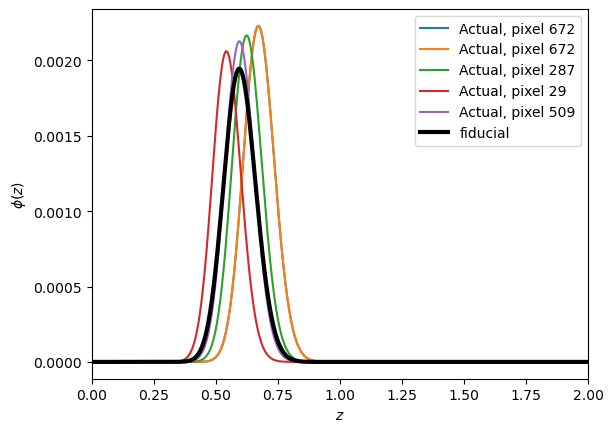

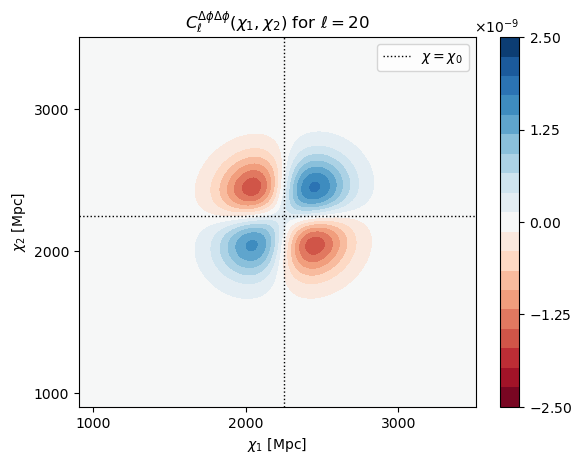

In [134]:
redmagic_wn.plot_realizations()
plt.show()
redmagic_wn.plot_ClDphi_vs_chi_chiprime_2D(20)

We save the key properties to file so they can be load by the parallel processes we're about to create.

In [135]:
filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside'.format(sigma_zshift, nside)
redmagic_wn.save_properties(filename)

#### Scripts for parallelization

Let's write a script to compute the biases in parallel, using a different core/process for each $\ell$:

In [137]:
%%writefile /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_biases_in_parallel.py
#!/global/homes/a/ab2368/.conda/envs/varying_dndz python
import sys
sys.path.insert(0, '/global/homes/a/ab2368/varying_dndzs/Varying_dndzs/code/')
import numpy as np
import biases

# Load scenario from file
sigma_zshift = 0.02703
nside = 8
filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside'.format(sigma_zshift, nside)
loaded_exp = biases.load_from_file(filename)

# Hyperparameters for numerical integration
num_processes = 16
miniter = 1000
maxiter = 5000
tol = 1e-11

# The ells where we want to evaluate the spectra
loaded_exp.ells = np.linspace(10, 1000, 16, dtype=int)

if hasattr(loaded_exp, 'conv_bias'):
    print("It looks like you've already computed the biases for this scenario. Please delete them from file you really want to re-rerun things.")
else:
    loaded_exp.conv_bias = biases.mode_coupling_bias(loaded_exp, loaded_exp.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)
    loaded_exp.save_properties(filename)
    loaded_exp.additive_bias = biases.additive_bias(loaded_exp, loaded_exp.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)
    loaded_exp.save_properties(filename)
    loaded_exp.unbiased_clgg = biases.unbiased_term(loaded_exp, loaded_exp.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)

# Save to file, this time including the biases as an attribute!
loaded_exp.save_properties(filename)

Overwriting /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_biases_in_parallel.py


This takes about 10 minutes on an interactive node on perlmutter

#### Inspecting the outputs

We can now simply plot the biases we've computed

Successfully loaded experiment object with properties:

Initialized empty object


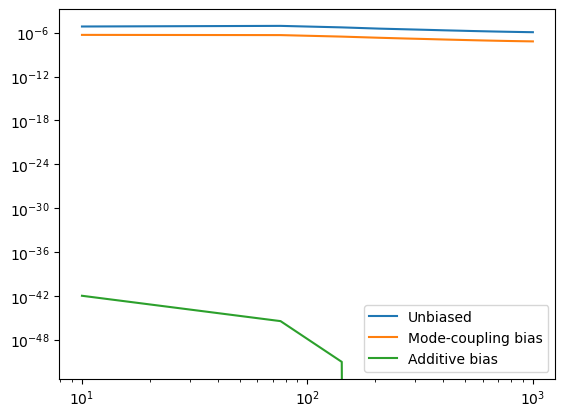

In [144]:
# Load scenario from file
sigma_zshift = 0.02703
nside = 8
filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside'.format(sigma_zshift, nside)
loaded_exp = biases.load_from_file(filename)

plt.loglog(loaded_exp.ells, loaded_exp.unbiased_clgg, label='Unbiased')
plt.loglog(loaded_exp.ells, loaded_exp.conv_bias, label='Mode-coupling bias')
plt.loglog(loaded_exp.ells, loaded_exp.additive_bias, label='Additive bias')

plt.legend()